In [24]:
import json
import requests
#from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates

In [25]:
# Load a file as a DataFrame and assign to df
df = pd.read_excel("Data/Disnea.xlsx")

In [26]:
df.keys()

Index(['id', 'FE_ALTA', 'Examen'], dtype='object')

In [27]:
col = np.char.lower(np.array(df.keys(), dtype='U'))
col[0] = 'id'
col[1] = 'fecha'
df.columns = col

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   id      137 non-null    int64         
 1   fecha   137 non-null    datetime64[ns]
 2   examen  137 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.3+ KB


In [29]:
# Cambiar texto a minuscula.
a = df['examen'].dtype

for col in df.columns:
    if df[col].dtype == a:
        df[col] = df[col].str.lower()

In [30]:
df

,id,fecha,examen
0,1998401,2016-06-02,escala de disnea mmrc epoc 0
1,1491934,2016-06-10,escala de disnea mmrc epoc 0
2,801004,2019-07-12,escala de disnea mmrc epoc 0
3,1226479,2019-07-26,escala de disnea mmrc epoc 0
4,1241688,2016-09-01,escala de disnea mmrc epoc 0
...,...,...,...
132,1690591,2016-03-08,escala de disnea mmrc epoc 4
133,1690591,2016-06-01,escala de disnea mmrc epoc 4
134,1718360,2016-12-13,escala de disnea mmrc epoc 4
135,1718360,2018-03-20,escala de disnea mmrc epoc 4


## ID analisis ##

In [31]:
id_df = pd.DataFrame(df["id"].value_counts()).reset_index()
id_df.columns = ['id', 'count']
print(id_df['count'].sum())
id_df

137


,id,count
0,916510,8
1,1427481,8
2,739693,8
3,1196034,7
4,524006,5
5,1690591,5
6,1536265,5
7,1764814,5
8,974281,5
9,1437443,4


In [32]:
pd.DataFrame(df["examen"].value_counts()).reset_index()

,index,examen
0,escala de disnea mmrc epoc 2,52
1,escala de disnea mmrc epoc 1,34
2,escala de disnea mmrc epoc 3,25
3,escala de disnea mmrc epoc 4,20
4,escala de disnea mmrc epoc 0,6


In [33]:
df["disnea"] = df["examen"].apply(
    lambda x: str(x)[-1])
df = df.drop(columns = ['examen'])
df

,id,fecha,disnea
0,1998401,2016-06-02,0
1,1491934,2016-06-10,0
2,801004,2019-07-12,0
3,1226479,2019-07-26,0
4,1241688,2016-09-01,0
...,...,...,...
132,1690591,2016-03-08,4
133,1690591,2016-06-01,4
134,1718360,2016-12-13,4
135,1718360,2018-03-20,4


## Analisis Fecha##

In [34]:
date_df = pd.DataFrame(df["fecha"].value_counts()).reset_index()
date_df.columns = ['fecha', 'count']
date_df = date_df.sort_values(by=['fecha']).reset_index(drop = True)
date_df.tail()

,fecha,count
101,2018-07-24,1
102,2018-07-26,1
103,2019-07-06,2
104,2019-07-12,2
105,2019-07-26,1


Text(0, 0.5, 'preguntas')

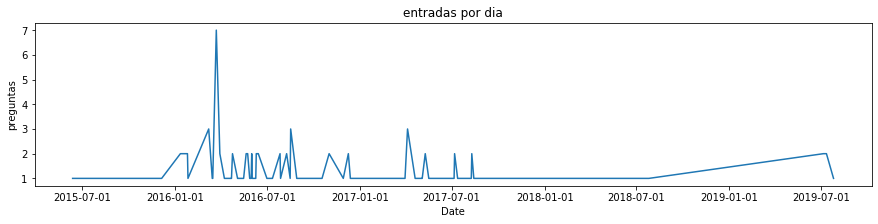

In [35]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(date_df["fecha"], date_df["count"])
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))  # format x-axis display
plt.title("entradas por dia")
plt.xlabel("Date")
plt.ylabel("preguntas")